### Feature Engineering


"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data." Jason Brownlee,

1. Construct new features: Use domain knowledge, creating products of features, etc.

2. Use recursive feature elimination to recursively remove attributes to meet the number of required features and then builds a model on those attributes that remain to see if you can you match or improve performance with a smaller subset.

3. Use backward elimination to recursively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

4. Forward selection begins with an empty equation. Predictors are added one at a time beginning with the predictor with the highest correlation with the dependent variable. Variables of greater theoretical importance are entered first. Once in the equation, the variable remains there.

5. Compare several of these feature selection methods. Select the best approach with model selection.

6. To improve performance and/or understanding, subsample your data and redo your analysis for several samples.

##### Curse of Dimensionality  ?


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
import wrangle
import env
import util
import split_scale

In [2]:
# scale data


In [3]:
# split data

In [4]:
# visualize data

# plt.scatter(df.exam_1, scaled_exam_1)


In [5]:

# x_train = scaled.drop(columns=["target"])
# y_train = scaled[["target"]]
# f_selector = SelectKBest(f_regression, k=3).fit(x_train, y_train)    k=10 by default   returns scores and p_values
# f_support.get_support()     calling a list of features by creating a boolean list
# x_train

#### Wrapper Methods

-evaluate based on the performance of your ML algorithm

    -backward elimination
        -run model, check, remove the worst
        -iterate
        
    -forward seelction
        -
        
    -recursive feature elimination (RFE)
        -take the model and number of features provided (k) and return ranking of all variables and its support (T/F)

#### Embedded Methods

    -LassoCV

    -ElasticNet

    -RidgeRegression

    -Regularized Regression

-penalize worst performing features

-assigns a coef of 0 to "bad" features


#### Lasso CV

from sklearn.linear_model import LassoCV

reg = LassoCV()

reg.fit(x_train, y_train)

reg.alpha_

reg.score(x_train, y_train)

reg.coef_


#### Linear Dimensionality Reduction

-PCA: principle components analysis

-unsupervised

-data must be scaled and centered

-not interpretable

-can have its use cases but...
    
    -black box, we won't look at this too much

#### Exercises

-Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

In [6]:
# wrangle gets and cleans data for me

df = wrangle.wrangle_telco()

In [7]:
df.head()

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.80,63
2,0016-QLJIS,90.45,5957.90,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72


#### Explore

1. are my indeendent variables independent of each other? (ideal)
    -this must be true for your regression to work
    
2. is my dependent variable dependent on the indepnedent variables? (ideal)

3. what are the drivers of my target variable? (could be some/all independent variables and/or other features not already identified)


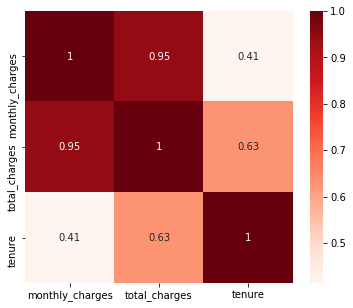

In [8]:
# Filter Method - Correlation: features to target, within features

plt.figure(figsize=(6, 5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

### Takeaway   ????  I don't know if this is true or not anymore

-monthly_charges shouldn't be used to predict total_charges bc one is a calculation of the other

-tenure is the only option

In [9]:
# create any new features and drop unneeded columns

df.drop(columns=["customer_id"], inplace=True)

In [10]:
df.head()

,monthly_charges,total_charges,tenure
0,109.70,7904.25,71
1,84.65,5377.80,63
2,90.45,5957.90,65
3,45.20,2460.55,54
4,116.80,8456.75,72


In [11]:
df.describe()

,monthly_charges,total_charges,tenure
count,1685.000000,1685.000000,1685.00000
mean,60.872374,3728.933947,57.07181
std,34.712210,2571.252806,17.72913
min,18.400000,20.350000,1.00000
25%,24.050000,1278.800000,48.00000
50%,64.450000,3623.950000,64.00000
75%,90.550000,5999.850000,71.00000
max,118.750000,8672.450000,72.00000


In [15]:
# split data into test and train using function
train, test = split_scale.split_my_data(df)
y_train = train[["total_charges"]]
x_train = train.drop(columns=["total_charges"])
y_test = test[["total_charges"]]
x_test = test.drop(columns=["total_charges"])

1 and 2. Write a function, select_kbest_freg_unscaled() that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.


In [21]:
def select_kbest_freg(x_train, y_train, k):
    """Removes all but highest scoring features
    Takes:
          k - int: number of features
          x_train - df of features
          y_train - df of target
    Returns:
          list of column names of highest scoring features
    """
    f_selector = SelectKBest(f_regression, k).fit(x_train, y_train)
    f_support = f_selector.get_support()
    f_feature = x_train.loc[:,f_support].columns.tolist()
    return f_feature

In [22]:
# unscaled train and test data from df
f_feature = select_kbest_freg(x_train, y_train, 2)
f_feature

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['monthly_charges', 'tenure']

In [23]:
# scale train and test data from df

scaler, train_scaled, test_scaled = split_scale.min_max_scaler(train, test)

In [29]:
y_train_scaled = train[["total_charges"]]
x_train_scaled = train.drop(columns=["total_charges"])

In [31]:
f_feature_scaled = select_kbest_freg(x_train_scaled, y_train_scaled, 2)
f_feature_scaled

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['monthly_charges', 'tenure']

3. Write a function, ols_backware_elimination() that takes X_train and y_train (scaled) as input and returns selected features based on the ols backwards elimination method.

In [34]:
ols_model = sm.OLS(y_train, x_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          total_charges   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.831e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:05:48   Log-Likelihood:                         -11012.
No. Observations:                1348   AIC:                                  2.203e+04
Df Residuals:                    1346   BIC:                                  2.204e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
monthly_charges    58.3707      0.731     79.905      0.000      56.938      59.804
tenure              6.7522      0.856      7.891      0.000       5.074       8.431
==============================================================================
Omnibus:                      218.755   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.196
Skew:                          -0.929   Prob(JB):                    1.77e-103
Kurtosis:                       5.230   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
def ols_backware_elimination(x_train, y_train):
    """
    
    """
    cols = list(x_train.columns)
    pmax = 1
    while (len(cols) > 0):
        p = []
        x_1 = x_train[cols]
        x_1 = sm.add_constant(x_1)
        model = sm.OLS(y_train, x_1).fit()
        p = pd.Series(model.pvalues.values[1:], index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    return cols 

In [43]:
ols_backware_elimination(x_train_scaled, y_train_scaled)

['monthly_charges', 'tenure']

4. Write a function, lasso_cv_coef() that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.

In [48]:
reg = LassoCV()
reg.fit(x_train_scaled, y_train_scaled)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [49]:
reg.alpha_

84.47402534407908

In [50]:
reg.score(x_train_scaled, y_train_scaled)

0.9635842541895119

In [52]:
coef = pd.Series(reg.coef_, index = x_train_scaled.columns)
coef

monthly_charges    61.130716
tenure             42.273035
dtype: float64

In [57]:
reg = LassoCV().fit(x_train_scaled, y_train_scaled)
reg

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [58]:
def lasso_cs_coef(x_train, y_train):
    """
    
    """
    reg = LassoCV().fit(x_train, y_train)
    coef = pd.Series(reg.coef_, index = x_train.columns)
    imp_coef = coef.sort_values()
    plot = imp_coef.plot(kind = "barh")
    return coef, plot

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(monthly_charges    61.130716
 tenure             42.273035
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x1c1e1d19b0>)

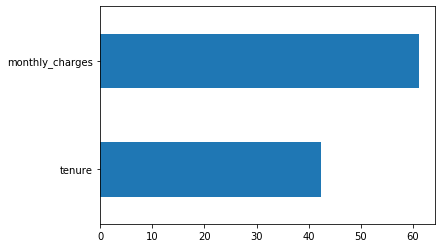

In [59]:
lasso_cs_coef(x_train_scaled, y_train_scaled)